In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [19]:
df = pd.read_csv ('Football teams.csv')
df.head(5)

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [20]:
df.isnull().sum()

Team            0
Tournament      0
Goals           0
Shots pg        0
yellow_cards    0
red_cards       0
Possession%     0
Pass%           0
AerialsWon      0
Rating          0
dtype: int64

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          98 non-null     object 
 1   Tournament    98 non-null     object 
 2   Goals         98 non-null     int64  
 3   Shots pg      98 non-null     float64
 4   yellow_cards  98 non-null     int64  
 5   red_cards     98 non-null     int64  
 6   Possession%   98 non-null     float64
 7   Pass%         98 non-null     float64
 8   AerialsWon    98 non-null     float64
 9   Rating        98 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.8+ KB


In [22]:
df["Tournament"].value_counts()


Serie A           20
Premier League    20
Ligue 1           20
LaLiga            20
Bundesliga        18
Name: Tournament, dtype: int64

In [23]:
NewTournament={
"Tournament" : {"Premier League":1,"LaLiga":2,"Bundesliga":3,"Serie A":4,"Ligue 1":5}
}
df.replace(NewTournament, inplace=True)

In [24]:
df.head()


,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,1,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,3,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,5,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,2,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,2,67,14.4,57,2,57.7,87.7,11.8,6.86


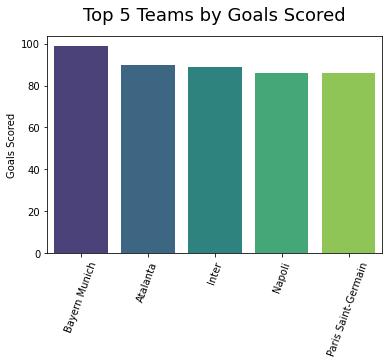

In [26]:
Five = df.sort_values(by='Goals', ascending=False).head(5)
sns.barplot(x='Team', y='Goals', data=Five, palette='viridis');
plt.xticks(rotation=70);
plt.xlabel('');
plt.ylabel('Goals Scored');
plt.title('Top 5 Teams by Goals Scored', loc='center', fontsize=18, pad=15);

Text(0, 0.5, 'Team Rating')

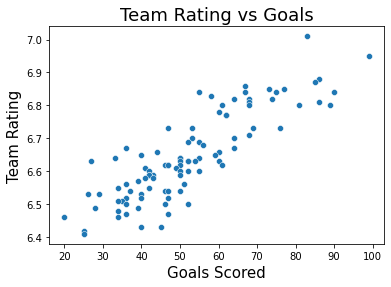

In [33]:
sns.scatterplot(x='Goals', y='Rating', data=df,)
plt.title('Team Rating vs Goals', fontsize=18)
plt.xlabel('Goals Scored', fontsize=15) 
plt.ylabel('Team Rating', fontsize=15)

We can see in this scatter plot that there is a correlation between the team rating and the goals scored . Generally,the more goals you score, the best rating you get.



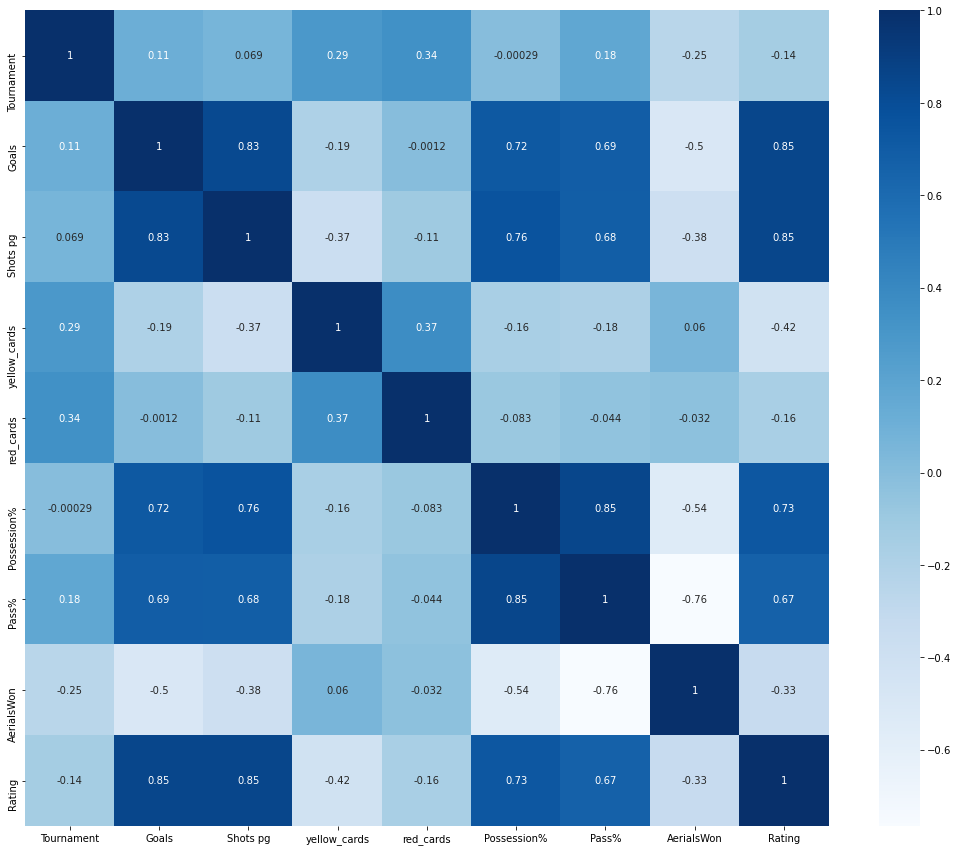

In [37]:
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Blues');

In the correlation matrix above, we can clearly see the correlation of the goals scored and the shots per game with the rating, both are equal to 0.80



In [40]:
x = df["Goals"].values[:,np.newaxis]
y = df["Rating"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.004295656755724705
R squared 0.7642008237588462


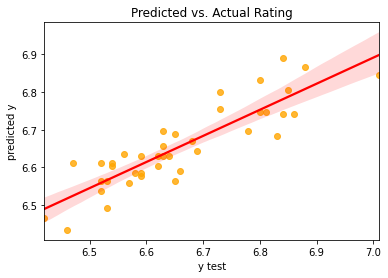

In [46]:
ax = sns.regplot(x=y_test, y=model.predict(x_test),
                scatter_kws={'color': 'orange'}, line_kws={'color':'red'});
ax.set(xlabel='y test', ylabel='predicted y');
ax.set(title='Predicted vs. Actual Team Rating');

We have a linear regression with a 76% rate of accuracy. it's good but let's try to improve it while using another model.



In [49]:
X = df[['Goals', 'Shots pg' ]]
y = df["Rating"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.36, random_state=1)

model=LinearRegression() #build linear regression model
model.fit(X_train,y_train) #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.002090316318073557
R squared 0.8000760163372793


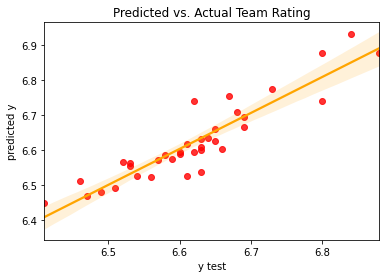

In [50]:
ax = sns.regplot(x=y_test, y=model.predict(X_test),
                scatter_kws={'color': 'red'}, line_kws={'color':'orange'});
ax.set(xlabel='y test', ylabel='predicted y');
ax.set(title='Predicted vs. Actual Team Rating');

We got a model with a 80% rate of accuracy. It's better.



To answer my problematic, I chose a machine learning model based on linear regression becase the target we work on has numerical values. Using correlation matrix Iselected the features with the higher correlation rate with the target to reach a good accuracy rate of prediction. I got 76% and then I used multi linear regression to improve it because more than 1 feature was correlated with the output.It finally reached 80%